In [471]:
import pandas as pd
import numpy as np

In [472]:
train_data = pd.read_csv("/Users/kristijanboshev/Desktop/archive-3/Train-Set.csv")
test_data = pd.read_csv("/Users/kristijanboshev/Desktop/archive-3/Test-Set.csv")

In [473]:
train_data.head()

,ProductID,Weight,FatContent,ProductVisibility,ProductType,MRP,OutletID,EstablishmentYear,OutletSize,LocationType,OutletType,OutletSales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [474]:
test_data.head()

,ProductID,Weight,FatContent,ProductVisibility,ProductType,MRP,OutletID,EstablishmentYear,OutletSize,LocationType,OutletType
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [475]:
train_data['dataset'] = 'train'
test_data['dataset'] = 'test'

Dodavame kolona dataset za da znaeme koj observacii se od train a koj od test posle spojuvanjeto

In [476]:
df = pd.concat([train_data,test_data])
df

,ProductID,Weight,FatContent,ProductVisibility,ProductType,MRP,OutletID,EstablishmentYear,OutletSize,LocationType,OutletType,OutletSales,dataset
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,train
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.50,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1,NaN,test
5677,FDD47,7.60,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2,NaN,test
5678,NCO17,10.00,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1,NaN,test
5679,FDJ26,15.30,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1,NaN,test


Spojuvanje na train i test datasets vo eden df

In [477]:
df.drop('ProductID',axis=1,inplace=True)
df

,Weight,FatContent,ProductVisibility,ProductType,MRP,OutletID,EstablishmentYear,OutletSize,LocationType,OutletType,OutletSales,dataset
0,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train
1,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train
2,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,train
4,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train
...,...,...,...,...,...,...,...,...,...,...,...,...
5676,10.50,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1,NaN,test
5677,7.60,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2,NaN,test
5678,10.00,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1,NaN,test
5679,15.30,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1,NaN,test


Dropnuvanje na ProductID kolonata, ne sluzi za nisto

In [478]:
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:>

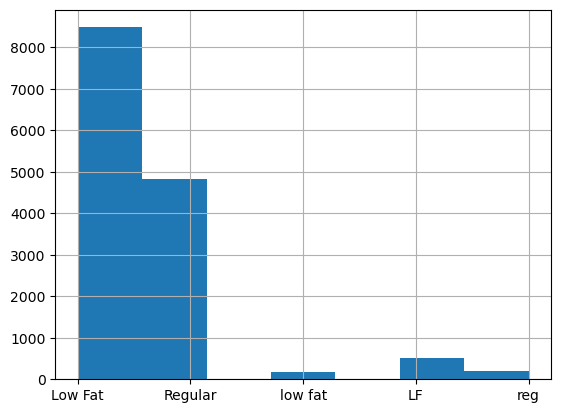

In [479]:
df['FatContent'].hist(bins = 7)

Bidejki Low Fat, lowfat i LF imaat isto znacenje treba da gi konvertirame vo edno, isto kako i reg i regular

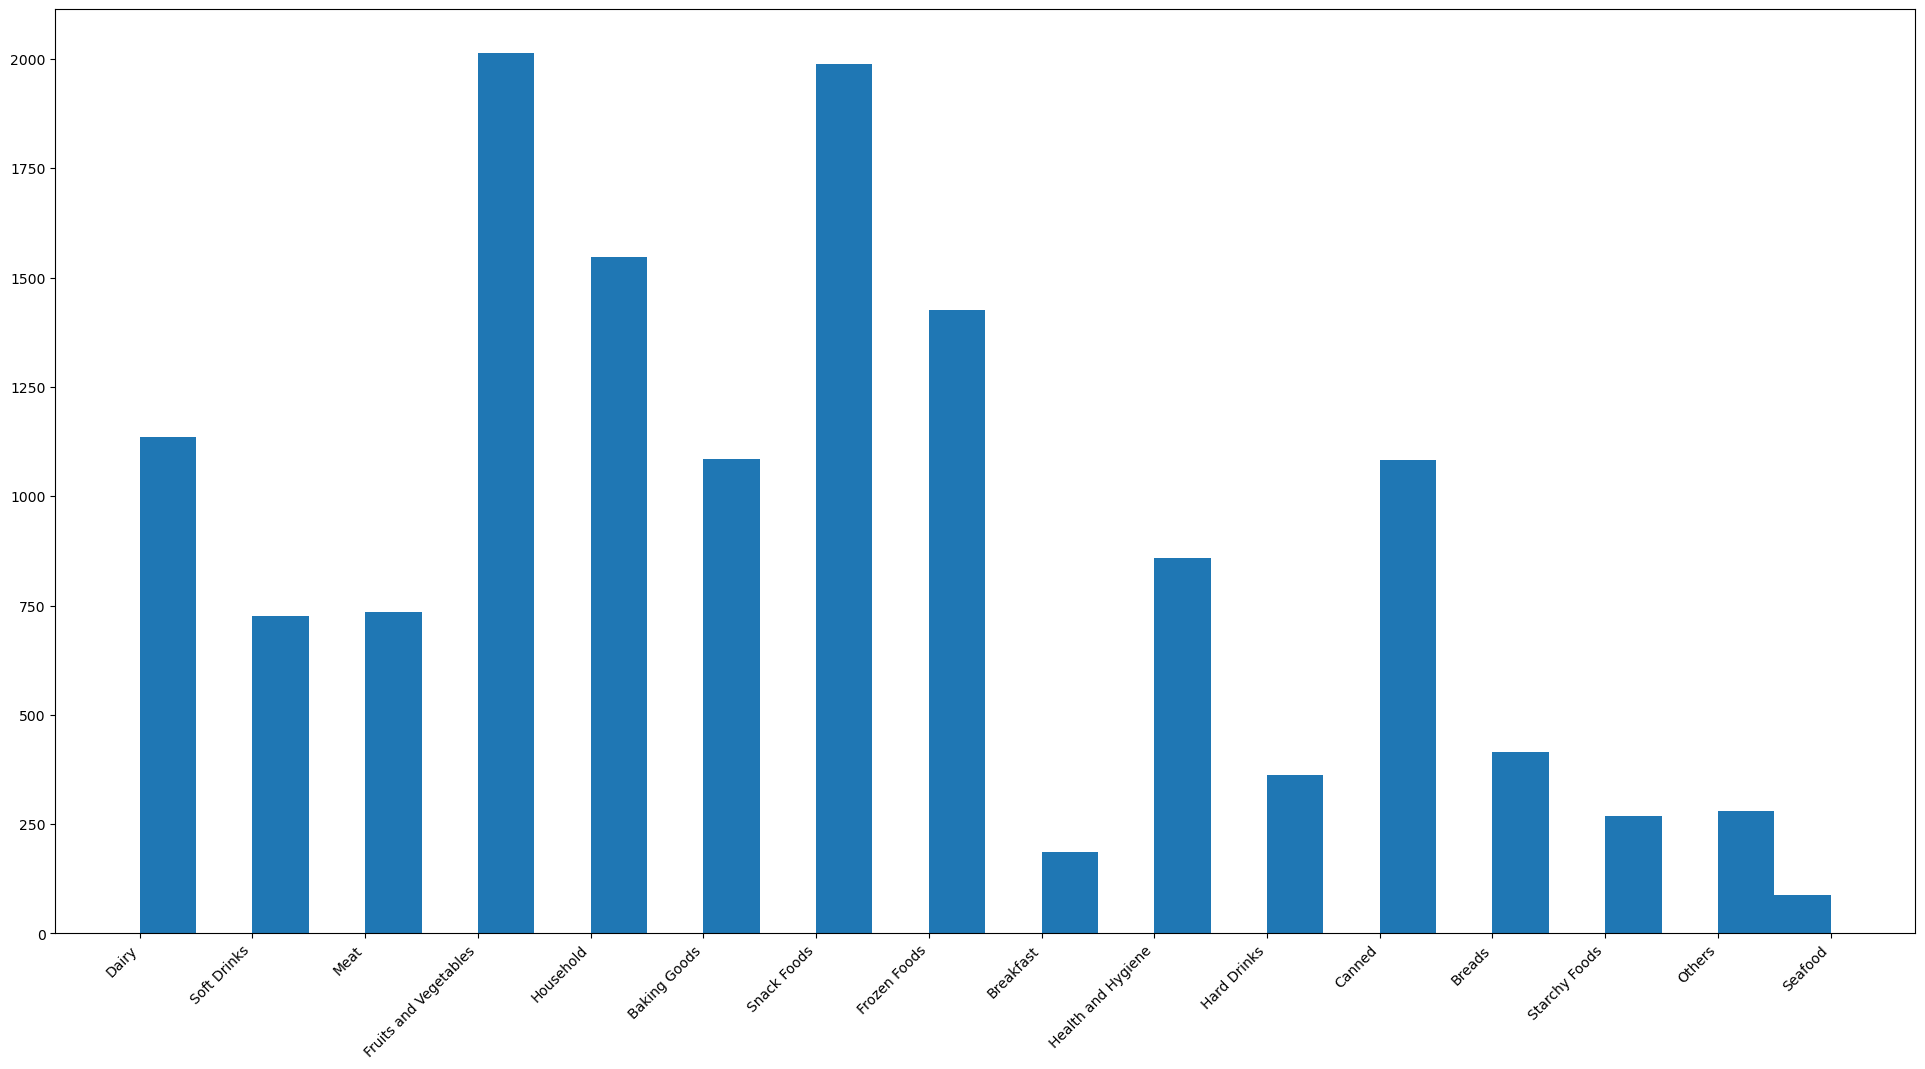

In [480]:
plt.figure(figsize=(24, 12))  # Adjust the figure size as needed
plt.hist(df['ProductType'], bins=30)
plt.xticks(rotation=45, ha='right')
plt.show()

In [481]:
missing_values_count = df.isnull().sum()
missing_values_count

Weight               2439
FatContent              0
ProductVisibility       0
ProductType             0
MRP                     0
OutletID                0
EstablishmentYear       0
OutletSize           4016
LocationType            0
OutletType              0
OutletSales          5681
dataset                 0
dtype: int64

In [482]:
missing_values_percentage = 100 * missing_values_count / len(df)
missing_values_percentage

Weight               17.171219
FatContent            0.000000
ProductVisibility     0.000000
ProductType           0.000000
MRP                   0.000000
OutletID              0.000000
EstablishmentYear     0.000000
OutletSize           28.273726
LocationType          0.000000
OutletType            0.000000
OutletSales          39.995776
dataset               0.000000
dtype: float64

In [483]:
import missingno as msno

<AxesSubplot:>

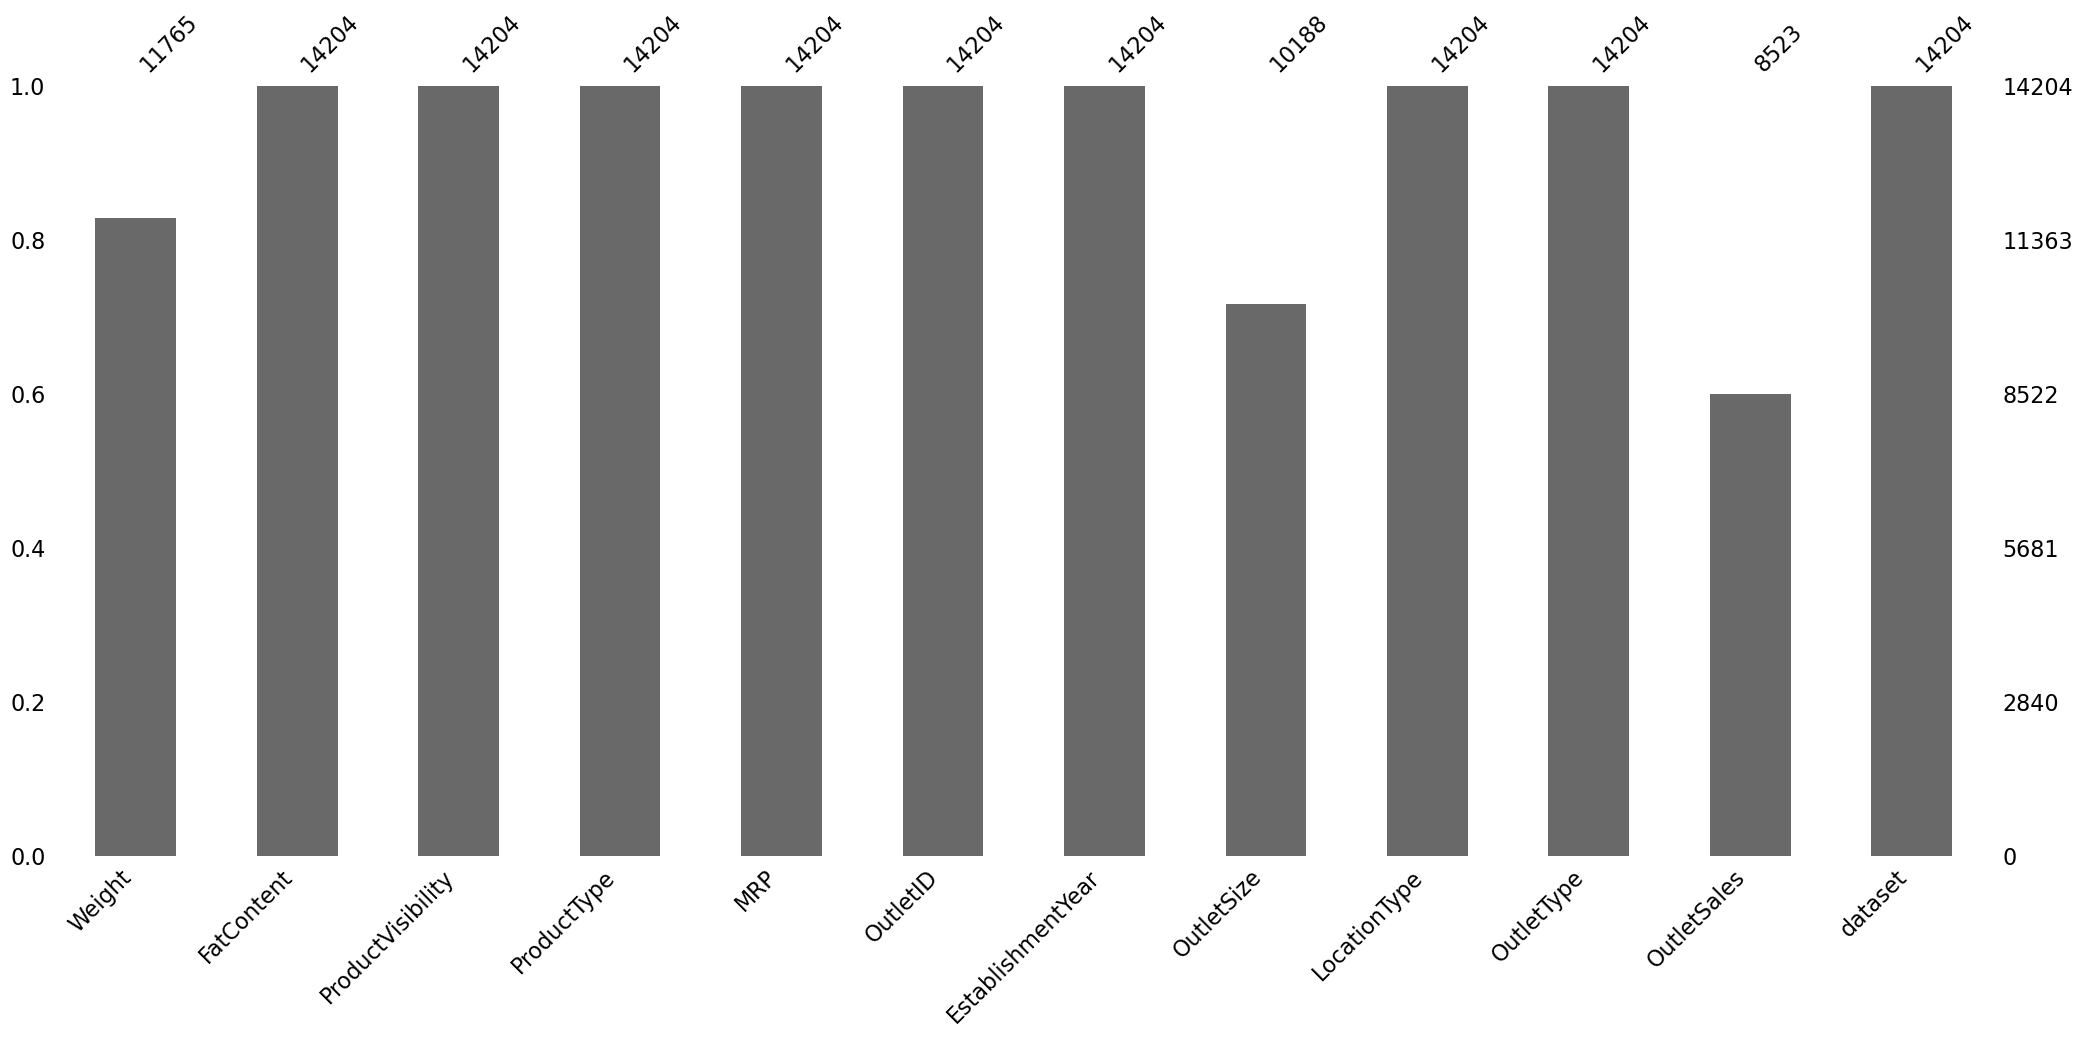

In [484]:
msno.bar(df)

<AxesSubplot:>

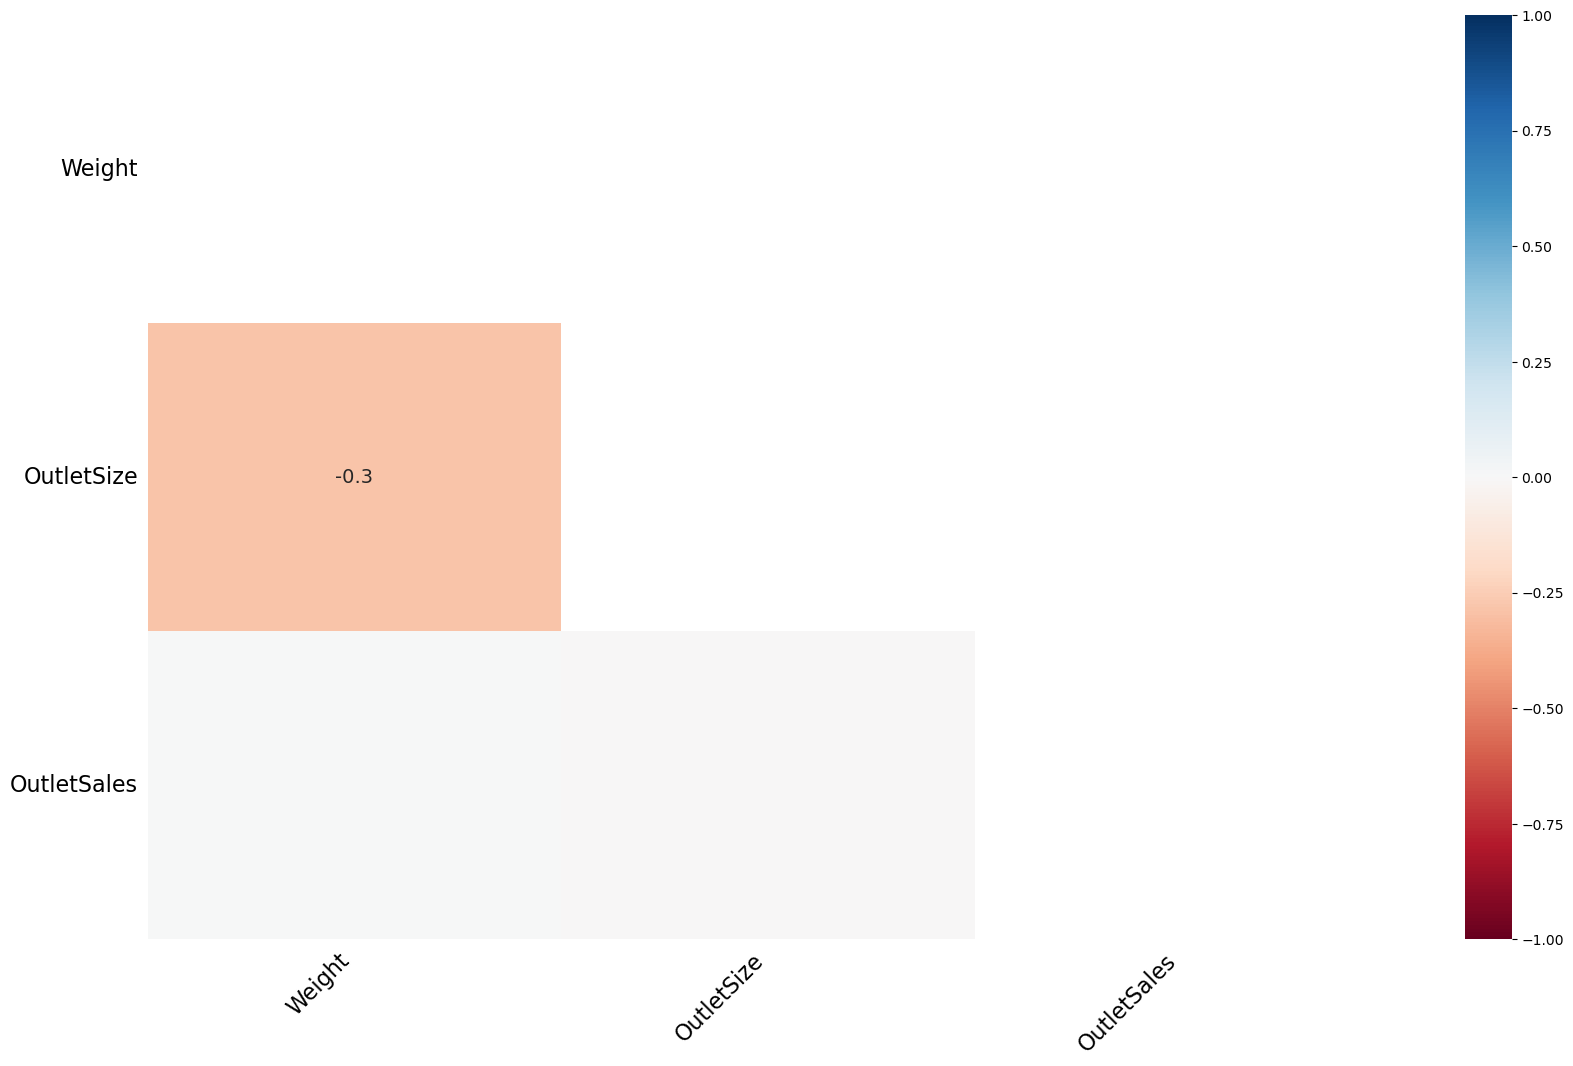

In [485]:
msno.heatmap(df)

<AxesSubplot:>

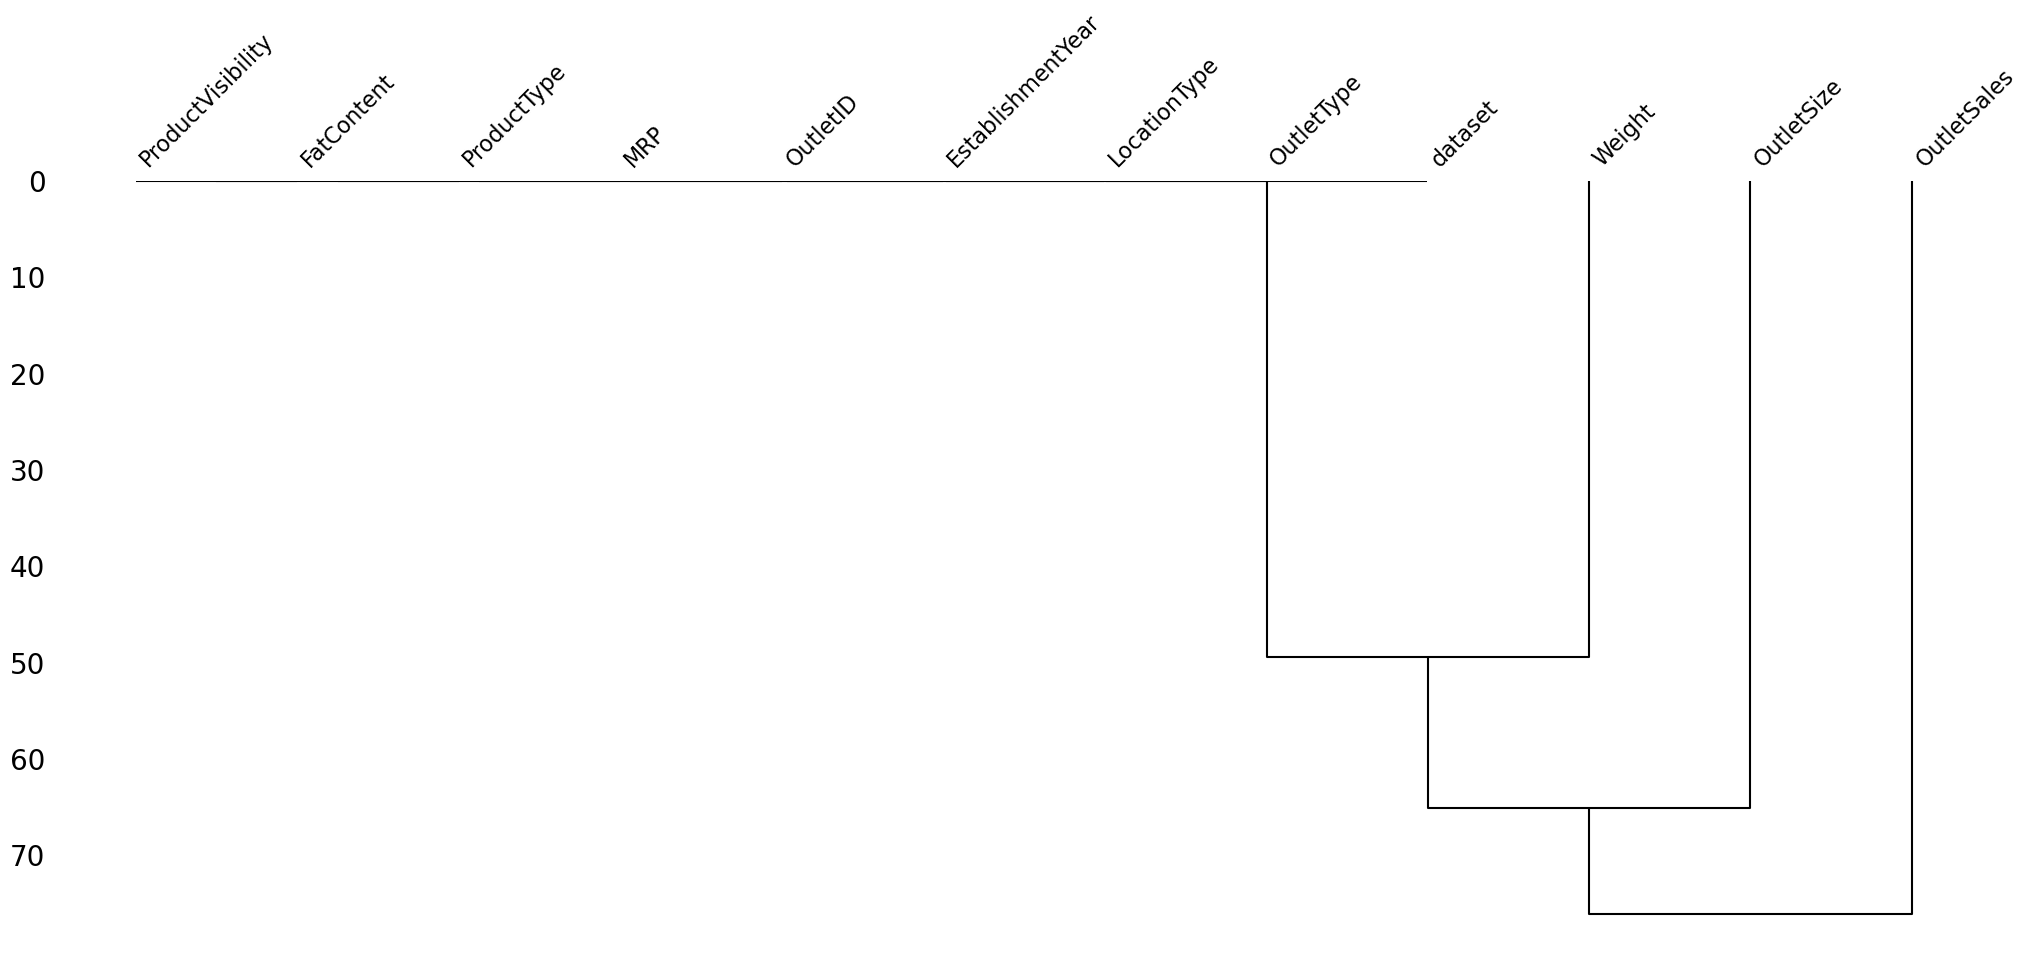

In [486]:
msno.dendrogram(df)

In [487]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [488]:
iterative_imputer = IterativeImputer(random_state=0)

In [489]:
df_copy = df.copy()

In [490]:
df_copy['Weight'] = iterative_imputer.fit_transform(df_copy['Weight'].to_numpy().reshape(-1,1))

Tuka koristime MICE kako imputer, toa koristi Linearna regresija i Round Robin algoritam. Gi deli site vrednosti vo nekolku delovi i potoa vrz sekoj del koristi linearna regresija. Potoa se presmatva prosek za sekoj del i se popolnuvaat site NaN.

In [491]:
df_copy['Weight'].head(20)

0      9.300000
1      5.920000
2     17.500000
3     19.200000
4      8.930000
5     10.395000
6     13.650000
7     12.792854
8     16.200000
9     19.200000
10    11.800000
11    18.500000
12    15.100000
13    17.600000
14    16.350000
15     9.000000
16    11.800000
17     9.000000
18    12.792854
19    13.350000
Name: Weight, dtype: float64

In [492]:
df_copy['Weight'].isnull().sum()

0

In [493]:
from sklearn.preprocessing import LabelEncoder

In [494]:
encoder = LabelEncoder()

In [495]:
df_copy['OutletSize'] = encoder.fit_transform(df_copy['OutletSize'])

In [496]:
df_copy['OutletSize'] 

0       1
1       1
2       1
3       3
4       0
       ..
5676    2
5677    1
5678    3
5679    3
5680    3
Name: OutletSize, Length: 14204, dtype: int64

In [497]:
#Note: Step 1 - Setting the value of k

k = 3

In [498]:
#Note: Step 2 - Normalization

from sklearn.preprocessing import MinMaxScaler

In [499]:
scaler = MinMaxScaler()

In [500]:
df_copy['OutletSize'].to_numpy().reshape(-1, 1)

array([[1],
       [1],
       [1],
       ...,
       [3],
       [3],
       [3]])

In [501]:
df_copy['OutletSize'] = scaler.fit_transform(df_copy['OutletSize'].to_numpy().reshape(-1, 1))

In [502]:
df_copy['OutletSize']

0       0.333333
1       0.333333
2       0.333333
3       1.000000
4       0.000000
          ...   
5676    0.666667
5677    0.333333
5678    1.000000
5679    1.000000
5680    1.000000
Name: OutletSize, Length: 14204, dtype: float64

In [503]:
#Note: Step 3 - Calculating the Euclidean distance & Step 4 - Prediction

from sklearn.impute import KNNImputer

In [504]:
imputer = KNNImputer(n_neighbors=k)

In [505]:
df_copy['OutletSize'] = imputer.fit_transform(df_copy['OutletSize'].to_numpy().reshape(-1, 1))

In [506]:
df_copy['OutletSize']

0       0.333333
1       0.333333
2       0.333333
3       1.000000
4       0.000000
          ...   
5676    0.666667
5677    0.333333
5678    1.000000
5679    1.000000
5680    1.000000
Name: OutletSize, Length: 14204, dtype: float64

In [507]:
df_copy['OutletSize'].isnull().sum()

0

In [508]:
unique_values = df_copy['OutletSize'].unique()
unique_values

array([0.33333333, 1.        , 0.        , 0.66666667])

In [509]:
df_copy.head(20)

,Weight,FatContent,ProductVisibility,ProductType,MRP,OutletID,EstablishmentYear,OutletSize,LocationType,OutletType,OutletSales,dataset
0,9.300000,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,0.333333,Tier 1,Supermarket Type1,3735.1380,train
1,5.920000,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,0.333333,Tier 3,Supermarket Type2,443.4228,train
2,17.500000,Low Fat,0.016760,Meat,141.6180,OUT049,1999,0.333333,Tier 1,Supermarket Type1,2097.2700,train
3,19.200000,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,1.000000,Tier 3,Grocery Store,732.3800,train
4,8.930000,Low Fat,0.000000,Household,53.8614,OUT013,1987,0.000000,Tier 3,Supermarket Type1,994.7052,train
5,10.395000,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,0.333333,Tier 3,Supermarket Type2,556.6088,train
6,13.650000,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,0.000000,Tier 3,Supermarket Type1,343.5528,train
7,12.792854,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,0.333333,Tier 3,Supermarket Type3,4022.7636,train
8,16.200000,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,1.000000,Tier 2,Supermarket Type1,1076.5986,train
9,19.200000,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,1.000000,Tier 2,Supermarket Type1,4710.5350,train


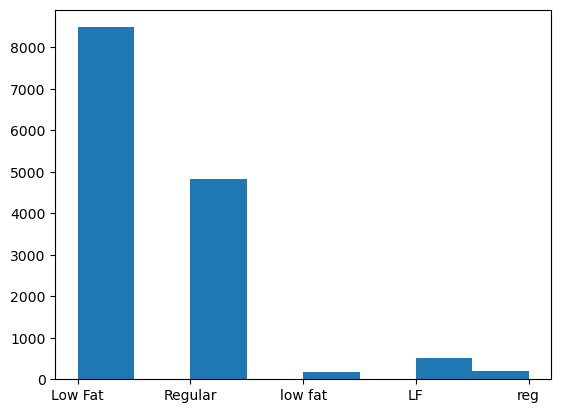

In [510]:
plt.hist(df_copy['FatContent'],bins=8)
plt.show()

In [511]:
df_copy['FatContent'].replace('LF','Low Fat',inplace=True)
df_copy['FatContent'].replace('low fat','Low Fat',inplace=True)
df_copy['FatContent'].replace('reg','Regular',inplace=True)

In [512]:
unique_values = df_copy['FatContent'].unique()
unique_values

array(['Low Fat', 'Regular'], dtype=object)

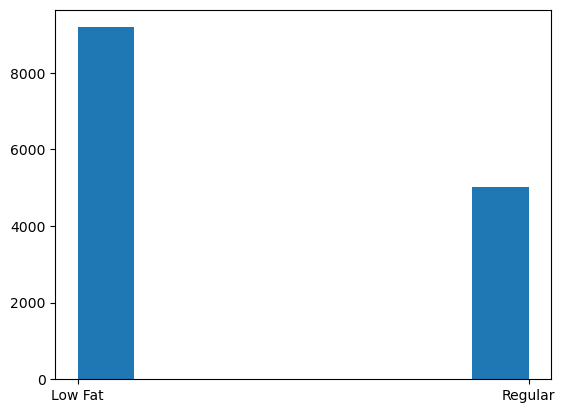

In [513]:
plt.hist(df_copy['FatContent'],bins=8)
plt.show()

In [514]:
unique_values = df_copy['ProductType'].unique()
unique_values

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [515]:
df_copy.drop('OutletID',axis=1,inplace=True)
df_copy.head()

,Weight,FatContent,ProductVisibility,ProductType,MRP,EstablishmentYear,OutletSize,LocationType,OutletType,OutletSales,dataset
0,9.30,Low Fat,0.016047,Dairy,249.8092,1999,0.333333,Tier 1,Supermarket Type1,3735.1380,train
1,5.92,Regular,0.019278,Soft Drinks,48.2692,2009,0.333333,Tier 3,Supermarket Type2,443.4228,train
2,17.50,Low Fat,0.016760,Meat,141.6180,1999,0.333333,Tier 1,Supermarket Type1,2097.2700,train
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,1998,1.000000,Tier 3,Grocery Store,732.3800,train
4,8.93,Low Fat,0.000000,Household,53.8614,1987,0.000000,Tier 3,Supermarket Type1,994.7052,train


In [516]:
df_copy['ProductType'] = encoder.fit_transform(df_copy['ProductType'])
df_copy['ProductType']

0        4
1       14
2       10
3        6
4        9
        ..
5676    13
5677    15
5678     8
5679     3
5680     3
Name: ProductType, Length: 14204, dtype: int64

In [517]:
df_copy['LocationType'] = encoder.fit_transform(df_copy['LocationType'])
df_copy['LocationType']

0       0
1       2
2       0
3       2
4       2
       ..
5676    0
5677    2
5678    1
5679    1
5680    1
Name: LocationType, Length: 14204, dtype: int64

In [518]:
df_copy['OutletType'] = encoder.fit_transform(df_copy['OutletType'])
df_copy['OutletType']

0       1
1       2
2       1
3       0
4       1
       ..
5676    1
5677    2
5678    1
5679    1
5680    1
Name: OutletType, Length: 14204, dtype: int64

In [519]:
df_copy['FatContent'] = encoder.fit_transform(df_copy['FatContent'])
df_copy['FatContent']

0       0
1       1
2       0
3       1
4       0
       ..
5676    1
5677    1
5678    0
5679    1
5680    1
Name: FatContent, Length: 14204, dtype: int64

In [520]:
df_copy.head()

,Weight,FatContent,ProductVisibility,ProductType,MRP,EstablishmentYear,OutletSize,LocationType,OutletType,OutletSales,dataset
0,9.30,0,0.016047,4,249.8092,1999,0.333333,0,1,3735.1380,train
1,5.92,1,0.019278,14,48.2692,2009,0.333333,2,2,443.4228,train
2,17.50,0,0.016760,10,141.6180,1999,0.333333,0,1,2097.2700,train
3,19.20,1,0.000000,6,182.0950,1998,1.000000,2,0,732.3800,train
4,8.93,0,0.000000,9,53.8614,1987,0.000000,2,1,994.7052,train


In [521]:
df_copy.drop('dataset',axis=1,inplace=True)

In [522]:
# Separate rows with NaN in the target column to X_test
X_test = df_copy[df_copy['OutletSales'].isna()].copy()


# Separate rows with non-NaN values in the target column to X_train and y_train
X_train = df_copy.dropna(subset=['OutletSales']).copy()
y_train = X_train['OutletSales']
X_train = X_train.drop(columns=['OutletSales'])

In [523]:
X_test.drop('OutletSales',axis=1,inplace=True)

In [524]:
X_test.head()

,Weight,FatContent,ProductVisibility,ProductType,MRP,EstablishmentYear,OutletSize,LocationType,OutletType
0,20.750000,0,0.007565,13,107.8622,1999,0.333333,0,1
1,8.300000,1,0.038428,4,87.3198,2007,1.000000,1,1
2,14.600000,0,0.099575,11,241.7538,1998,1.000000,2,0
3,7.315000,0,0.015388,13,155.0340,2007,1.000000,1,1
4,12.792854,1,0.118599,4,234.2300,1985,0.333333,2,3


In [525]:
X_train.head()

,Weight,FatContent,ProductVisibility,ProductType,MRP,EstablishmentYear,OutletSize,LocationType,OutletType
0,9.30,0,0.016047,4,249.8092,1999,0.333333,0,1
1,5.92,1,0.019278,14,48.2692,2009,0.333333,2,2
2,17.50,0,0.016760,10,141.6180,1999,0.333333,0,1
3,19.20,1,0.000000,6,182.0950,1998,1.000000,2,0
4,8.93,0,0.000000,9,53.8614,1987,0.000000,2,1


In [526]:
from sklearn.preprocessing import StandardScaler

In [527]:
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [528]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [529]:
from sklearn.linear_model import LinearRegression

model = LinearRegression().fit(X_train, y_train)

In [530]:
y_pred = model.predict(X_test)
y_pred

array([1838.44606417, 1247.66932942, 2274.0455047 , ..., 1621.24882019,
       3296.80155399, 1020.84729565])

In [541]:
df_copy['OutletSales'].loc[df_copy['OutletSales'].isna()] = y_pred
df


/var/folders/18/2qvtzbvx3gj8284cbq2q0mvh0000gn/T/ipykernel_1203/3167881584.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copy['OutletSales'].loc[df_copy['OutletSales'].isna()] = y_pred


,Weight,FatContent,ProductVisibility,ProductType,MRP,OutletID,EstablishmentYear,OutletSize,LocationType,OutletType,OutletSales,dataset
0,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.138000,train
1,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.422800,train
2,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.270000,train
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.380000,train
4,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.705200,train
...,...,...,...,...,...,...,...,...,...,...,...,...
5676,10.50,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1,2412.525231,test
5677,7.60,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2,3031.489934,test
5678,10.00,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1,1621.248820,test
5679,15.30,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1,3296.801554,test


In [542]:
df_copy.isnull().sum()

Weight               0
FatContent           0
ProductVisibility    0
ProductType          0
MRP                  0
EstablishmentYear    0
OutletSize           0
LocationType         0
OutletType           0
OutletSales          0
dtype: int64